In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [505]:
df_p = pd.read_csv('pokemon.csv')
df_p = df_p.set_index('pid')
df_p

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True


In [506]:
df_c = pd.read_csv('combats.csv')
df_c

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


# Question 1

## 1.

In [507]:
df_p.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [508]:
classes = df_p['Class 1'].unique()
classes

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

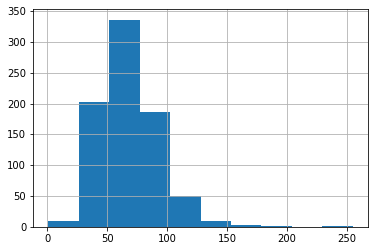

In [509]:
df_p['HP'].hist()

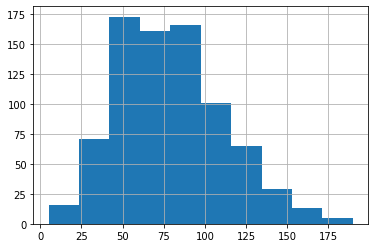

In [510]:
df_p['Attack'].hist()

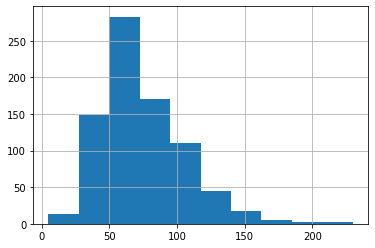

In [511]:
df_p['Defense'].hist()

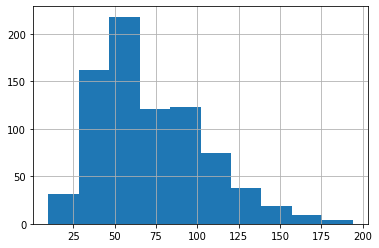

In [512]:
df_p['Sp. Atk'].hist()

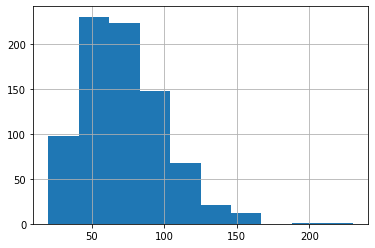

In [513]:
df_p['Sp. Def'].hist()

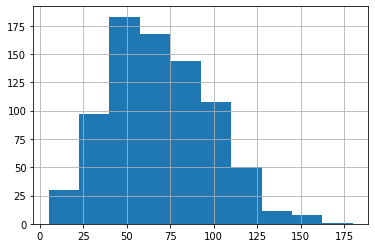

In [514]:
df_p['Speed'].hist()

## 2.

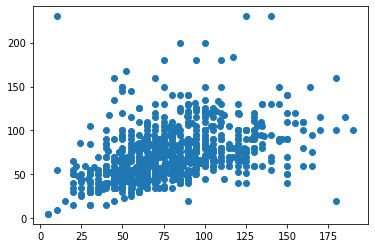

In [515]:
plt.scatter(df_p['Attack'], df_p['Defense'])

In [516]:
df_p_c = df_p.copy()
df_p_c['Ratio'] = df_p['Attack'] / df_p['Defense']
df_p_c = df_p_c.sort_values(by='Ratio')

Worst ratio:

In [517]:
df_p_c[:3]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Ratio
pid,,,,,,,,,,,
231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070


Best ratio:

In [518]:
df_p_c[-3:]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Ratio
pid,,,,,,,,,,,
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,3.75
348,Carvanha,Water,Dark,45,90,20,65,20,65,False,4.50
430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,9.00


Most successful pokemons:

In [538]:
df_p.iloc[df_c['Winner'].value_counts()[:10].index-1]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
438,Infernape,Fire,Fighting,76,104,71,104,71,108,False
428,Jirachi,Steel,Psychic,100,100,100,100,100,100,True
432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
314,Slaking,Normal,NaN,150,160,100,95,65,100,False
214,Murkrow,Dark,Flying,60,85,42,85,42,91,False
394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False
249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False


## 3.

In [520]:
mask = (df_p['Class 1'] == 'Grass') | (df_p['Class 2'] == 'Grass')
grass_poke = df_p[mask]
grass_poke.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [521]:
mask = (df_p['Class 1'] != 'Rock') & (df_p['Class 2'] != 'Rock')
grass_poke = grass_poke[mask]
grass_poke.head()

/Users/avenezia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [522]:
mask = (df_p['Class 1'] == 'Rock') | (df_p['Class 2'] == 'Rock')
rock_poke = df_p[mask]
rock_poke.head()

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
81,Geodude,Rock,Ground,40,80,100,30,30,20,False
82,Graveler,Rock,Ground,55,95,115,45,45,35,False
83,Golem,Rock,Ground,80,120,130,55,65,45,False
104,Onix,Rock,Ground,35,45,160,30,45,70,False
120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [523]:
mask = (df_p['Class 1'] != 'Grass') & (df_p['Class 2'] != 'Grass')
rock_poke = rock_poke[mask]
rock_poke.head()

/Users/avenezia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
81,Geodude,Rock,Ground,40,80,100,30,30,20,False
82,Graveler,Rock,Ground,55,95,115,45,45,35,False
83,Golem,Rock,Ground,80,120,130,55,65,45,False
104,Onix,Rock,Ground,35,45,160,30,45,70,False
120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [524]:
print(f"Grass: {grass_poke['Attack'].median()} VS Rock: {rock_poke['Attack'].median()}")

Grass: 70.0 VS Rock: 92.5


The rock pokemons have a larger attack median.

## 4.

In [416]:
import pyspark
import pyspark.sql
from pyspark.sql import *
from pyspark.sql.functions import *

spark = SparkSession.builder.getOrCreate()

# create the context
sc = spark.sparkContext

In [417]:
pokemon = spark.read.format("csv").option("header", "true").load("pokemon.csv")
combats = spark.read.format("csv").option("header", "true").load("combats.csv")

In [418]:
pokemon.show()

+---+----------------+-------+-------+---+------+-------+-------+-------+-----+---------+
|pid|            Name|Class 1|Class 2| HP|Attack|Defense|Sp. Atk|Sp. Def|Speed|Legendary|
+---+----------------+-------+-------+---+------+-------+-------+-------+-----+---------+
|  1|       Bulbasaur|  Grass| Poison| 45|    49|     49|     65|     65|   45|    FALSE|
|  2|         Ivysaur|  Grass| Poison| 60|    62|     63|     80|     80|   60|    FALSE|
|  3|        Venusaur|  Grass| Poison| 80|    82|     83|    100|    100|   80|    FALSE|
|  4|   Mega Venusaur|  Grass| Poison| 80|   100|    123|    122|    120|   80|    FALSE|
|  5|      Charmander|   Fire|   null| 39|    52|     43|     60|     50|   65|    FALSE|
|  6|      Charmeleon|   Fire|   null| 58|    64|     58|     80|     65|   80|    FALSE|
|  7|       Charizard|   Fire| Flying| 78|    84|     78|    109|     85|  100|    FALSE|
|  8|Mega Charizard X|   Fire| Dragon| 78|   130|    111|    130|     85|  100|    FALSE|
|  9|Mega 

In [419]:
combats.show()

+-------------+--------------+------+
|First_pokemon|Second_pokemon|Winner|
+-------------+--------------+------+
|          266|           298|   298|
|          702|           701|   701|
|          191|           668|   668|
|          237|           683|   683|
|          151|           231|   151|
|          657|           752|   657|
|          192|           134|   134|
|           73|           545|   545|
|          220|           763|   763|
|          302|            31|    31|
|          442|           130|   130|
|          701|           624|   701|
|           15|           283|   283|
|          151|            87|   151|
|          269|           462|   269|
|          763|           448|   448|
|          143|           263|   263|
|          365|           240|   240|
|          499|           774|   499|
|          563|           578|   563|
+-------------+--------------+------+
only showing top 20 rows



In [420]:
best_poke = combats.groupBy('Winner').count().sort(desc('count')).limit(10).persist()
best_poke.show()

+------+-----+
|Winner|count|
+------+-----+
|   163|  152|
|   154|  136|
|   438|  136|
|   428|  134|
|   432|  133|
|   314|  133|
|   214|  130|
|   394|  130|
|   249|  128|
|   155|  127|
+------+-----+



In [421]:
best_poke.join(pokemon, best_poke.Winner == pokemon.pid, how='left').show()

+------+-----+---+------------------+-------+--------+---+------+-------+-------+-------+-----+---------+
|Winner|count|pid|              Name|Class 1| Class 2| HP|Attack|Defense|Sp. Atk|Sp. Def|Speed|Legendary|
+------+-----+---+------------------+-------+--------+---+------+-------+-------+-------+-----+---------+
|   163|  152|163|            Mewtwo|Psychic|    null|106|   110|     90|    154|     90|  130|     TRUE|
|   154|  136|154|        Aerodactyl|   Rock|  Flying| 80|   105|     65|     60|     75|  130|    FALSE|
|   438|  136|438|         Infernape|   Fire|Fighting| 76|   104|     71|    104|     71|  108|    FALSE|
|   428|  134|428|           Jirachi|  Steel| Psychic|100|   100|    100|    100|    100|  100|     TRUE|
|   432|  133|432|Deoxys Speed Forme|Psychic|    null| 50|    95|     90|     95|     90|  180|     TRUE|
|   314|  133|314|           Slaking| Normal|    null|150|   160|    100|     95|     65|  100|    FALSE|
|   214|  130|214|           Murkrow|   Dark| 

# Question 2

## 1. and 2.

In [422]:
df_p['Class 2'] = df_p['Class 2'].fillna(-1)

In [423]:
classes_idx = {c:i for i, c in enumerate(classes)}
classes_idx[-1] = -1
classes_idx

{'Grass': 0,
 'Fire': 1,
 'Water': 2,
 'Bug': 3,
 'Normal': 4,
 'Poison': 5,
 'Electric': 6,
 'Ground': 7,
 'Fairy': 8,
 'Fighting': 9,
 'Psychic': 10,
 'Rock': 11,
 'Ghost': 12,
 'Ice': 13,
 'Dragon': 14,
 'Dark': 15,
 'Steel': 16,
 'Flying': 17,
 -1: -1}

In [424]:
df_p['Class 1'] = df_p['Class 1'].apply(lambda x: classes_idx[x]) 
df_p['Class 2'] = df_p['Class 2'].apply(lambda x: classes_idx[x]) 

In [425]:
df_p['Class 1'] = df_p['Class 1'].astype('category')
df_p['Class 2'] = df_p['Class 2'].astype('category')

In [426]:
df_p['Legendary'] = df_p['Legendary'].apply(lambda x: 1 if x == True else 0)

In [427]:
df_p

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,0,5,45,49,49,65,65,45,0
2,Ivysaur,0,5,60,62,63,80,80,60,0
3,Venusaur,0,5,80,82,83,100,100,80,0
4,Mega Venusaur,0,5,80,100,123,122,120,80,0
5,Charmander,1,-1,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...,...,...,...
796,Diancie,11,8,50,100,150,100,150,50,1
797,Mega Diancie,11,8,50,160,110,160,110,110,1
798,Hoopa Confined,10,12,80,110,60,150,130,70,1


In [428]:
features = df_p.drop('Name', axis=1)
features

,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,
1,0,5,45,49,49,65,65,45,0
2,0,5,60,62,63,80,80,60,0
3,0,5,80,82,83,100,100,80,0
4,0,5,80,100,123,122,120,80,0
5,1,-1,39,52,43,60,50,65,0
...,...,...,...,...,...,...,...,...,...
796,11,8,50,100,150,100,150,50,1
797,11,8,50,160,110,160,110,110,1
798,10,12,80,110,60,150,130,70,1


In [429]:
features = features.to_numpy()

In [430]:
df_c

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [431]:
df_c['Winner'] = np.where(df_c['Winner'] == df_c['First_pokemon'], 1, 2)
df_c

,First_pokemon,Second_pokemon,Winner
0,266,298,2
1,702,701,2
2,191,668,2
3,237,683,2
4,151,231,1
...,...,...,...
49995,707,126,1
49996,589,664,1
49997,303,368,2
49998,109,89,1


In [432]:
df_c['First_pokemon'] = df_c['First_pokemon'].apply(lambda x: features[x-1])
df_c['Second_pokemon'] = df_c['Second_pokemon'].apply(lambda x: features[x-1])

In [433]:
df_c

,First_pokemon,Second_pokemon,Winner
0,"[11, 7, 50, 64, 50, 45, 50, 41, 0]","[0, 15, 70, 70, 40, 60, 40, 60, 0]",2
1,"[0, 9, 91, 90, 72, 90, 129, 108, 1]","[11, 9, 91, 129, 90, 72, 90, 108, 1]",2
2,"[8, 17, 55, 40, 85, 80, 105, 40, 0]","[10, -1, 75, 75, 75, 125, 95, 40, 0]",2
3,"[1, -1, 40, 40, 40, 70, 40, 20, 0]","[14, -1, 77, 120, 90, 60, 90, 48, 0]",2
4,"[11, 2, 70, 60, 125, 115, 70, 55, 0]","[3, 11, 20, 10, 230, 10, 230, 5, 0]",1
...,...,...,...
49995,"[14, 1, 100, 120, 100, 150, 120, 90, 1]","[2, -1, 30, 40, 70, 70, 25, 60, 0]",1
49996,"[7, -1, 60, 85, 40, 30, 45, 68, 0]","[6, -1, 35, 55, 40, 45, 40, 60, 0]",1
49997,"[2, 17, 60, 50, 100, 85, 70, 65, 0]","[4, -1, 73, 115, 60, 60, 60, 90, 0]",2
49998,"[6, -1, 40, 30, 50, 55, 55, 100, 0]","[6, 16, 25, 35, 70, 95, 55, 45, 0]",1


In [478]:
X = df_c[['First_pokemon', 'Second_pokemon']].to_numpy()
X = np.array([np.concatenate(x) for x in X])
X.shape

(50000, 18)

In [479]:
y = df_c['Winner'].to_numpy()
y

array([2, 2, 2, ..., 2, 1, 1])

## 3.

In [480]:
def split_data(X, y, ratio=0.9, seed=1):
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = X[index_tr]
    x_te = X[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [481]:
x_train, x_test, y_train, y_test = split_data(X, y)

In [482]:
from sklearn.ensemble import RandomForestClassifier

estimators = [10, 25, 50, 100]
depths = [2, 4, 10]

results = np.zeros((len(estimators), len(depths)))
for i, estim in enumerate(estimators):
    for j, depth in enumerate(depths):
        rf = RandomForestClassifier(n_estimators=estim, max_depth=depth)
        rf.fit(x_train, y_train)
        results[i, j] = rf.score(x_test, y_test)

In [488]:
best_estim_idx, best_depth_idx = np.unravel_index(results.argmax(), results.shape)

In [492]:
best_estim = estimators[best_estim_idx]
best_depth = depths[best_depth_idx]

In [493]:
best_estim

50

In [494]:
best_depth

10

In [495]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [502]:
rf.feature_importances_

array([0.0079773 , 0.01095752, 0.02219205, 0.04482174, 0.01256661,
       0.0325304 , 0.01818304, 0.35606761, 0.00550059, 0.0092334 ,
       0.0110638 , 0.02101611, 0.03921668, 0.0132977 , 0.03080328,
       0.01776732, 0.34164307, 0.0051618 ])

# Question 3

In [532]:
victories = df_c['Winner'].value_counts()
battles = df_c['First_pokemon'].value_counts() + df_c['Second_pokemon'].value_counts()
ratio = victories / battles

In [537]:
df_p.iloc[ratio.sort_values(ascending=False)[:10].index-1]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
513,Weavile,Dark,Ice,70,120,65,45,85,125,False
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
727,Greninja,Water,Dark,72,95,67,103,71,122,False
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True


In [541]:
pokemons = df_p['Name'].unique()

In [ ]:
df_dom = pd.DataFrame()
for p1 in pokemons:
    for p2 in pokemons:
        if p1 != p2:
            row = {}
            row['Pokemon_1'] = p1
            row['Victories_1'] = 0
            row['Pokemon_2'] = p2
            row['Victories_2'] = 0
            df_dom.append(row, ignore_index=True)
            
df_dom